In [156]:
import pandas as pd
import numpy as np
import holidays as calender
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from fbprophet import Prophet
from random import *
from sklearn.cluster import KMeans
from datetime import datetime

In [212]:
#list of prices
prices_str = ['/Users/fyalisiaamandaputri/informatiCup2018/Eingabedaten/Benzinpreise/6176.csv',
             '/Users/fyalisiaamandaputri/informatiCup2018/Eingabedaten/Benzinpreise/13214.csv',
             '/Users/fyalisiaamandaputri/informatiCup2018/Eingabedaten/Benzinpreise/13619.csv',
             '/Users/fyalisiaamandaputri/informatiCup2018/Eingabedaten/Benzinpreise/823.csv',
             '/Users/fyalisiaamandaputri/informatiCup2018/Eingabedaten/Benzinpreise/9132.csv',
             '/Users/fyalisiaamandaputri/informatiCup2018/Eingabedaten/Benzinpreise/8232.csv',
             '/Users/fyalisiaamandaputri/informatiCup2018/Eingabedaten/Benzinpreise/12711.csv',
             '/Users/fyalisiaamandaputri/informatiCup2018/Eingabedaten/Benzinpreise/8501.csv',
             '/Users/fyalisiaamandaputri/informatiCup2018/Eingabedaten/Benzinpreise/12297.csv',
             '/Users/fyalisiaamandaputri/informatiCup2018/Eingabedaten/Benzinpreise/5789.csv']


,2014-06-08 09:50:01+02;1529
0,2014-06-09 00:02:01+02;1599
1,2014-06-09 04:26:01+02;1549
2,2014-06-09 05:54:01+02;1529
3,2014-06-09 07:34:01+02;1529
4,2014-06-09 14:10:01+02;1529


In [217]:
data = pd.read_csv('/Users/fyalisiaamandaputri/informatiCup2018/Eingabedaten/Benzinpreise/13214.csv')
print(data)

       2014-06-08 09:50:01+02;1529
0      2014-06-09 00:02:01+02;1599
1      2014-06-09 04:26:01+02;1549
2      2014-06-09 05:54:01+02;1529
3      2014-06-09 07:34:01+02;1529
4      2014-06-09 14:10:01+02;1529
5      2014-06-09 23:02:01+02;1599
6      2014-06-10 02:10:01+02;1599
7      2014-06-10 03:46:01+02;1589
8      2014-06-10 04:46:01+02;1569
9      2014-06-10 07:38:01+02;1559
10     2014-06-10 09:46:01+02;1549
11     2014-06-10 11:38:01+02;1539
12     2014-06-10 13:06:01+02;1529
13     2014-06-10 16:46:01+02;1609
14     2014-06-11 02:26:01+02;1609
15     2014-06-11 03:54:01+02;1569
16     2014-06-11 04:26:01+02;1559
17     2014-06-11 07:34:01+02;1549
18     2014-06-11 09:34:01+02;1539
19     2014-06-11 16:46:01+02;1599
20     2014-06-12 02:06:01+02;1579
21     2014-06-12 04:06:01+02;1549
22     2014-06-12 16:46:01+02;1599
23     2014-06-13 02:18:01+02;1559
24     2014-06-13 16:42:01+02;1609
25     2014-06-14 03:34:01+02;1609
26     2014-06-14 03:38:01+02;1599
27     2014-06-14 04

In [158]:
def all_prices():
    prices = pd.read_csv(prices_str[0], header = None, delimiter = ';', index_col=0, names = str(0))
    for i in range(1,len(prices_str)):
        temp = pd.read_csv(prices_str[i], header = None, delimiter = ';', index_col=0, names = str(i))
        prices = prices.append(temp)
    index = pd.DatetimeIndex(prices.index)
    prices.set_index(index, inplace = True)
    prices = prices.resample('h').mean()
    return prices

#all_prices()

In [230]:
def create_model(x,i):
    m = Prophet(yearly_seasonality=True, holidays=hol(ds))
    print('ts {} is being fit'.format(i))
    m.fit(x)
    f = m.predict(x)
    return f

In [231]:
def predicts(prices):
    filled_prices = pd.DataFrame(index = prices.index)
    for i in range(len(prices.columns)):
        renamed = pd.DataFrame(data = prices[str(i)], index = prices.index)
        renamed.reset_index(inplace = True)
        renamed.rename(columns = {'index': 'ds', str(i): 'y'}, inplace = True)
        filled_prices = filled_prices.assign(x = create_model(renamed,i)['yhat'].values)
        filled_prices.rename(columns = {'x': str(i)}, inplace = True)
    return filled_prices

In [232]:
#articles =pd.DataFrame({
    #'holiday':'publish',
ds = pd.DatetimeIndex(['2016-01-01', '2016-01-06', '2016-02-08', '2016-03-25',
                       '2016-03-28', '2016-05-01', '2016-05-05', '2016-05-08',
                       '2016-05-16', '2016-05-26', '2016-08-15', '2016-09-17',
                       '2016-10-03', '2016-10-31', '2016-11-01', '2016-11-16',
                       '2016-12-25', '2016-12-26', '2017-01-01', '2017-01-06',
                       '2017-02-27', '2017-04-14', '2017-04-17', '2017-05-01',
                       '2017-05-14', '2017-05-25', '2017-06-05', '2017-06-15', 
                       '2017-08-15', '2017-09-16', '2017-10-03', '2017-10-31',
                       '2017-11-01', '2017-11-22', '2017-12-25', '2017-12-26'])


In [233]:
def hol(b):
    rng=[]
    for i in b:
        rng.extend(pd.date_range(i, periods=24, freq='H'))
    df = pd.DataFrame(index=rng)
    return df          

In [234]:
hol(ds)

""
2016-01-01 00:00:00
2016-01-01 01:00:00
2016-01-01 02:00:00
2016-01-01 03:00:00
2016-01-01 04:00:00
2016-01-01 05:00:00
2016-01-01 06:00:00
2016-01-01 07:00:00
2016-01-01 08:00:00
2016-01-01 09:00:00


In [235]:
len(ds)

36

In [236]:
#articles.index = articles['ds']
#del articles['ds']
#articles.head()

In [237]:
#type(articles['ds'])
#type(articles.index['ds'].date())
#type(articles.index.iloc[0]['ds'])

In [238]:
#type(all_prices().index.date[0])

In [239]:
#all_prices().index[0] 

In [240]:
(all_prices().loc[all_prices().index.isin(hol(ds).index)]['2016':'2017'])

,0,1,2,3,4,5,6,7,8,9
2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 04:00:00,NaN,NaN,NaN,1289.000000,NaN,NaN,NaN,NaN,NaN,1329.000000
2016-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 07:00:00,1309.000000,NaN,NaN,NaN,1299.000000,NaN,1269.0,NaN,1289.0,1304.000000
2016-01-01 08:00:00,NaN,1279.000000,NaN,NaN,NaN,NaN,NaN,NaN,1269.0,1269.000000
2016-01-01 09:00:00,NaN,1269.000000,NaN,1269.000000,NaN,1269.0,1229.0,NaN,1269.0,1239.000000


In [241]:
holidays = predicts(all_prices().loc[all_prices().index.isin(hol(ds).index)]['2016':'2017'])

ValueError: holidays must be a DataFrame with 'ds' and 'holiday' columns.

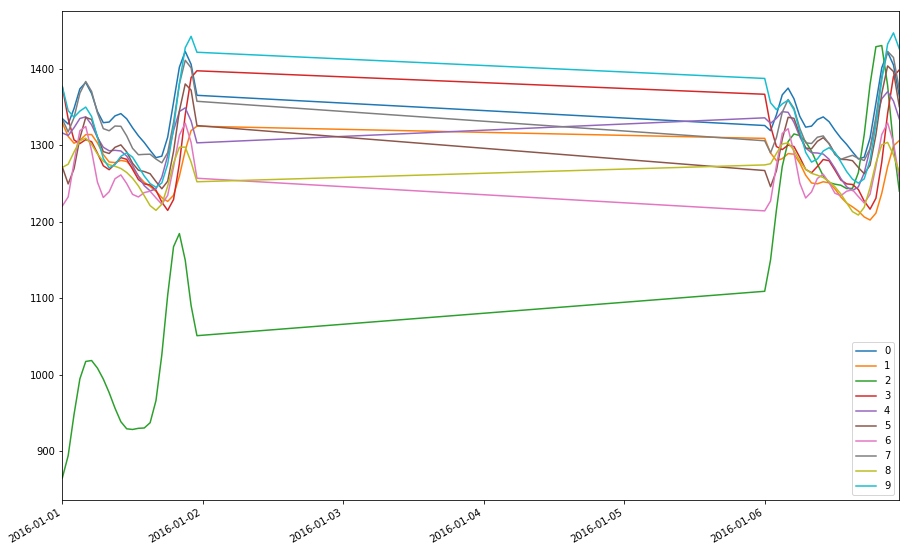

In [210]:
holidays['2016-01'].plot(figsize = (15,10))
plt.show()

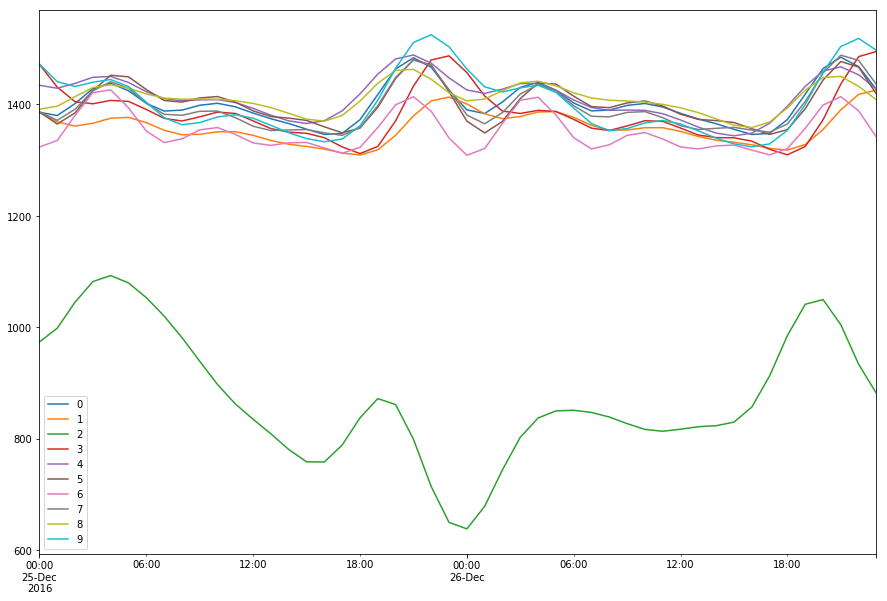

In [213]:
holidays['2016-12-25':'2016-12-26'].plot(figsize = (15,10))
plt.show()

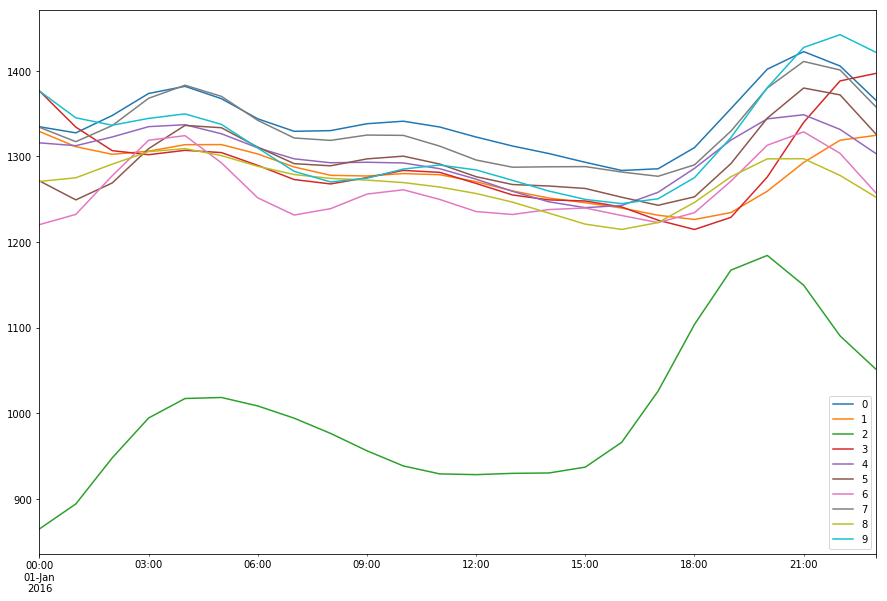

In [216]:
holidays['2016-01-01'].plot(figsize = (15,10))
plt.show()

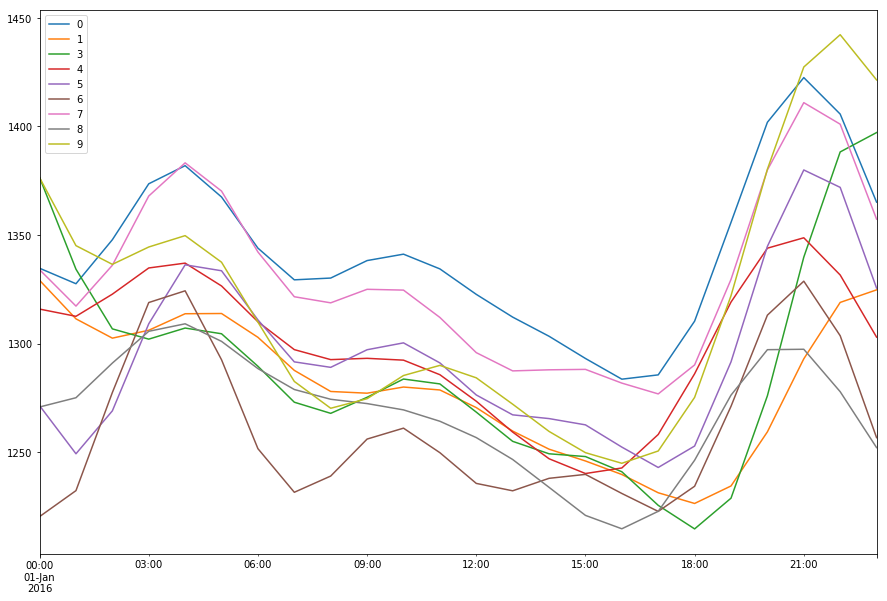

In [215]:
holidays.loc['2016-01-01'].drop(labels = '2', axis = 1).plot(figsize = (15,10))
plt.show()